In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import random
import math

In [2]:
df=pd.read_csv('../data/survey_results_public.csv')

In [3]:
print('df has {} rows and {} columns'.format(*df.shape))

df has 64461 rows and 61 columns


In [4]:
df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

In [5]:
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [6]:
categoricals=[]
multi_options=[]
numericals=[]

In [7]:
categoricals.append('MainBranch')
df['MainBranch'].unique()

array(['I am a developer by profession', 'I code primarily as a hobby',
       'I used to be a developer by profession, but no longer am',
       'I am not primarily a developer, but I write code sometimes as part of my work',
       'I am a student who is learning to code', nan], dtype=object)

In [8]:
numericals.append('Age')
pd.to_numeric(df['Age'], errors='coerce')

0         NaN
1         NaN
2         NaN
3        25.0
4        31.0
         ... 
64456     NaN
64457     NaN
64458     NaN
64459     NaN
64460     NaN
Name: Age, Length: 64461, dtype: float64

In [9]:
numericals.append('Age1stCode')
pd.to_numeric(df['Age1stCode'], errors='coerce')

0        13.0
1        19.0
2        15.0
3        18.0
4        16.0
         ... 
64456    16.0
64457     NaN
64458     NaN
64459     NaN
64460     NaN
Name: Age1stCode, Length: 64461, dtype: float64

In [10]:
categoricals.append('Country')
df['Country'].unique()

array(['Germany', 'United Kingdom', 'Russian Federation', 'Albania',
       'United States', 'India', 'Tunisia', 'Spain', 'Netherlands',
       'France', 'Belgium', 'Portugal', 'Canada', 'China', 'Ukraine',
       'Italy', 'Brazil', 'Austria', 'Mexico', 'Sweden', 'Poland',
       'Indonesia', 'Greece', 'Israel', 'Czech Republic',
       'Bosnia and Herzegovina', 'Bulgaria', 'Serbia', 'Switzerland',
       'Hungary', 'Nepal', 'Slovenia', 'Uruguay', 'Denmark', 'Pakistan',
       'Taiwan', 'Romania', 'Finland', 'Costa Rica', 'Nigeria', 'Chile',
       'Turkey', 'Panama', 'Ireland', 'Estonia', 'Philippines',
       'Australia', 'Nomadic', 'Peru', 'Cyprus', 'Sri Lanka', 'Kenya',
       'Norway', 'Kyrgyzstan', 'Iran', 'Croatia', 'Egypt', 'Argentina',
       'Ghana', 'Latvia', 'Morocco', 'Bangladesh', 'Ecuador', 'Haiti',
       'Venezuela, Bolivarian Republic of...', 'Colombia', 'Lithuania',
       'El Salvador', 'Honduras', 'Ethiopia', 'Lebanon', 'Uganda',
       'Algeria', 'Viet Nam', 'Guat

In [11]:
multi_options.append('DatabaseWorkedWith')
df['DatabaseWorkedWith'].str.get_dummies(sep=';').columns

Index(['Cassandra', 'Couchbase', 'DynamoDB', 'Elasticsearch', 'Firebase',
       'IBM DB2', 'MariaDB', 'Microsoft SQL Server', 'MongoDB', 'MySQL',
       'Oracle', 'PostgreSQL', 'Redis', 'SQLite'],
      dtype='object')

In [83]:
df['DevType'].unique()

array(['Developer, desktop or enterprise applications;Developer, full-stack',
       'Developer, full-stack;Developer, mobile', nan, ...,
       'Data scientist or machine learning specialist;Database administrator;Developer, back-end;Developer, front-end;System administrator',
       'Academic researcher;Data or business analyst;Data scientist or machine learning specialist;Database administrator;Designer;Developer, back-end;Developer, desktop or enterprise applications;Developer, embedded applications or devices;Developer, front-end;Developer, full-stack;Developer, game or graphics;Developer, mobile;Developer, QA or test;DevOps specialist;Senior executive/VP;System administrator',
       'Data or business analyst;Developer, mobile;Senior executive/VP;System administrator'],
      dtype=object)

In [12]:
multi_options.append('DevType')
df['DevType'].str.get_dummies(sep=';').columns

Index(['Academic researcher', 'Data or business analyst',
       'Data scientist or machine learning specialist',
       'Database administrator', 'Designer', 'DevOps specialist',
       'Developer, QA or test', 'Developer, back-end',
       'Developer, desktop or enterprise applications',
       'Developer, embedded applications or devices', 'Developer, front-end',
       'Developer, full-stack', 'Developer, game or graphics',
       'Developer, mobile', 'Educator', 'Engineer, data',
       'Engineer, site reliability', 'Engineering manager',
       'Marketing or sales professional', 'Product manager', 'Scientist',
       'Senior executive/VP', 'System administrator'],
      dtype='object')

In [13]:
categoricals.append('EdLevel')
df['EdLevel'].unique()

array(['Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)', nan,
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Professional degree (JD, MD, etc.)',
       'Some college/university study without earning a degree',
       'Associate degree (A.A., A.S., etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'Primary/elementary school',
       'I never completed any formal education'], dtype=object)

In [14]:
categoricals.append('Employment')
df['Employment'].unique()

array(['Independent contractor, freelancer, or self-employed',
       'Employed full-time', nan, 'Student',
       'Not employed, but looking for work', 'Employed part-time',
       'Retired', 'Not employed, and not looking for work'], dtype=object)

In [15]:
# multi_options.append('Ethnicity')
# df['Ethnicity'].str.get_dummies(sep=';')

In [16]:
multi_options.append('Gender')
df['Gender'].str.get_dummies(sep=';').columns

Index(['Man', 'Non-binary, genderqueer, or gender non-conforming', 'Woman'], dtype='object')

In [17]:
multi_options.append('LanguageWorkedWith')
df['LanguageWorkedWith'].str.get_dummies(sep=';').columns

Index(['Assembly', 'Bash/Shell/PowerShell', 'C', 'C#', 'C++', 'Dart', 'Go',
       'HTML/CSS', 'Haskell', 'Java', 'JavaScript', 'Julia', 'Kotlin',
       'Objective-C', 'PHP', 'Perl', 'Python', 'R', 'Ruby', 'Rust', 'SQL',
       'Scala', 'Swift', 'TypeScript', 'VBA'],
      dtype='object')

In [18]:
multi_options.append('MiscTechWorkedWith')
df['MiscTechWorkedWith'].str.get_dummies(sep=';').columns

Index(['.NET', '.NET Core', 'Ansible', 'Apache Spark', 'Chef', 'Cordova',
       'Flutter', 'Hadoop', 'Keras', 'Node.js', 'Pandas', 'Puppet',
       'React Native', 'TensorFlow', 'Teraform', 'Torch/PyTorch', 'Unity 3D',
       'Unreal Engine', 'Xamarin'],
      dtype='object')

In [19]:
multi_options.append('NEWCollabToolsWorkedWith')
df['NEWCollabToolsWorkedWith'].str.get_dummies(sep=';').columns

Index(['Confluence', 'Facebook Workplace', 'Github', 'Gitlab',
       'Google Suite (Docs, Meet, etc)', 'Jira', 'Microsoft Azure',
       'Microsoft Teams', 'Slack', 'Stack Overflow for Teams', 'Trello'],
      dtype='object')

In [20]:
categoricals.append('OpSys')
df['OpSys'].unique()

array(['Windows', 'MacOS', 'Linux-based', nan, 'BSD'], dtype=object)

In [21]:
multi_options.append('PlatformWorkedWith')
df['PlatformWorkedWith'].str.get_dummies(sep=';').columns

Index(['AWS', 'Android', 'Arduino', 'Docker', 'Google Cloud Platform',
       'Heroku', 'IBM Cloud or Watson', 'Kubernetes', 'Linux', 'MacOS',
       'Microsoft Azure', 'Raspberry Pi', 'Slack Apps and Integrations',
       'Windows', 'WordPress', 'iOS'],
      dtype='object')

In [22]:
categoricals.append('UndergradMajor')
df['UndergradMajor'].unique()

array(['Computer science, computer engineering, or software engineering',
       nan, 'Mathematics or statistics',
       'Another engineering discipline (such as civil, electrical, mechanical, etc.)',
       'A humanities discipline (such as literature, history, philosophy, etc.)',
       'A health science (such as nursing, pharmacy, radiology, etc.)',
       'Information systems, information technology, or system administration',
       'Web development or web design',
       'A natural science (such as biology, chemistry, physics, etc.)',
       'Fine arts or performing arts (such as graphic design, music, studio art, etc.)',
       'I never declared a major',
       'A social science (such as anthropology, psychology, political science, etc.)',
       'A business discipline (such as accounting, finance, marketing, etc.)'],
      dtype=object)

In [23]:
multi_options.append('WebframeWorkedWith')
df['WebframeWorkedWith'].str.get_dummies(sep=';').columns

Index(['ASP.NET', 'ASP.NET Core', 'Angular', 'Angular.js', 'Django', 'Drupal',
       'Express', 'Flask', 'Gatsby', 'Laravel', 'React.js', 'Ruby on Rails',
       'Spring', 'Symfony', 'Vue.js', 'jQuery'],
      dtype='object')

In [24]:
numericals.append('YearsCode')
pd.to_numeric(df['YearsCode'], errors='coerce')

0        36.0
1         7.0
2         4.0
3         7.0
4        15.0
         ... 
64456    10.0
64457     NaN
64458     NaN
64459     NaN
64460     NaN
Name: YearsCode, Length: 64461, dtype: float64

In [122]:
numericals.append('YearsCodePro')
df['YearsCodeProNEW']=pd.to_numeric(df['YearsCodePro'], errors='coerce').map(lambda x: min(x, 10))
# df['YearsCodePro']=df['YearsCodePro'].map(lambda x: max(x, 10))

['Age', 'Age1stCode', 'YearsCode', 'YearsCodePro']

['MainBranch', 'Country', 'EdLevel', 'Employment', 'OpSys', 'UndergradMajor']

['DatabaseWorkedWith', 'DevType', 'Gender', 'LanguageWorkedWith', 'MiscTechWorkedWith', 'NEWCollabToolsWorkedWith', 'PlatformWorkedWith', 'WebframeWorkedWith']

In [133]:
# print(numericals)
# numericals=['Age', 'Age1stCode', 'YearsCode', 'YearsCodePro']
numericals=['YearsCodePro']
# print(categoricals)
# categoricals=['MainBranch', 'Country', 'EdLevel', 'Employment', 'OpSys', 'UndergradMajor']
categoricals=['EdLevel']
# print(multi_options)
# multi_options=['DatabaseWorkedWith', 'DevType', 'Gender', 'LanguageWorkedWith', 'MiscTechWorkedWith', 'NEWCollabToolsWorkedWith', 'PlatformWorkedWith', 'WebframeWorkedWith']
multi_options=['DatabaseWorkedWith', 'DevType', 'LanguageWorkedWith', 'MiscTechWorkedWith', 'NEWCollabToolsWorkedWith', 'PlatformWorkedWith', 'WebframeWorkedWith']

In [132]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
# input_ary=X.dropna()[['YearsCodePro']]
# y=X.dropna()['ConvertedComp']
X_train, X_test, y_train, y_test=train_test_split(input_ary, y)
lr.fit(input_ary, y)
lr.score(input_ary, y)

0.12199551738677772

In [134]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
X=df[(df['ConvertedComp']<=500000) & (df['ConvertedComp']>=40000) & (df['Employment']=='Employed full-time')]#[['ConvertedComp']]
X=X[X['Country']=='United States'][['ConvertedComp']]
# X=X[['ConvertedComp']]
for each_col in numericals:
    X=pd.concat([X, pd.to_numeric(df[each_col], errors='coerce')], axis=1)
for each_col in categoricals: 
    X=pd.concat([X, pd.get_dummies(df[each_col])], axis=1)
for each_col in multi_options: 
    X=pd.concat([X, df[each_col].str.get_dummies(sep=';')], axis=1)    
input_ary=X.dropna().drop('ConvertedComp', axis=1)
y=X.dropna()['ConvertedComp']
print(input_ary.shape)
print(sorted(input_ary.columns))
X_train, X_test, y_train, y_test=train_test_split(input_ary, y)
rfr=RandomForestRegressor()
rfr.fit(X_train, y_train)
print(f'Train Score: {rfr.score(X_train, y_train)}')
print(f'Test Score: {rfr.score(X_test, y_test)}')

(6788, 134)
['.NET', '.NET Core', 'ASP.NET', 'ASP.NET Core', 'AWS', 'Academic researcher', 'Android', 'Angular', 'Angular.js', 'Ansible', 'Apache Spark', 'Arduino', 'Assembly', 'Associate degree (A.A., A.S., etc.)', 'Bachelor’s degree (B.A., B.S., B.Eng., etc.)', 'Bash/Shell/PowerShell', 'C', 'C#', 'C++', 'Cassandra', 'Chef', 'Confluence', 'Cordova', 'Couchbase', 'Dart', 'Data or business analyst', 'Data scientist or machine learning specialist', 'Database administrator', 'Designer', 'DevOps specialist', 'Developer, QA or test', 'Developer, back-end', 'Developer, desktop or enterprise applications', 'Developer, embedded applications or devices', 'Developer, front-end', 'Developer, full-stack', 'Developer, game or graphics', 'Developer, mobile', 'Django', 'Docker', 'Drupal', 'DynamoDB', 'Educator', 'Elasticsearch', 'Engineer, data', 'Engineer, site reliability', 'Engineering manager', 'Express', 'Facebook Workplace', 'Firebase', 'Flask', 'Flutter', 'Gatsby', 'Github', 'Gitlab', 'Go', 'G

In [135]:
rfr.feature_importances_

array([1.90462542e-01, 2.20316171e-03, 7.83955470e-03, 1.95109854e-04,
       9.75006222e-03, 5.51221765e-03, 2.46978698e-05, 5.75792434e-03,
       1.66195332e-03, 4.87366424e-03, 5.12241151e-03, 2.22795933e-03,
       1.06589724e-02, 4.44722390e-03, 4.18502589e-03, 1.04371313e-03,
       2.99700732e-03, 1.84110345e-02, 4.52112901e-03, 7.71424149e-03,
       6.75889876e-03, 9.39599194e-03, 6.78582148e-03, 6.51690959e-03,
       6.05773008e-03, 4.68826309e-03, 3.62004357e-03, 2.58900303e-03,
       4.14700337e-03, 4.20777781e-03, 2.81920437e-03, 8.41752070e-03,
       6.90229646e-03, 5.64756866e-03, 8.57277726e-03, 9.07127768e-03,
       2.34590429e-03, 5.80534108e-03, 2.76418382e-03, 4.25862335e-03,
       5.43546903e-03, 1.39315136e-02, 1.71286539e-03, 6.04019290e-03,
       4.46361397e-03, 1.10814904e-02, 4.25655782e-03, 6.05108588e-03,
       8.68109330e-03, 7.70860554e-03, 9.75345841e-03, 1.65188212e-02,
       1.50837063e-03, 1.39745115e-02, 1.52121345e-02, 4.46729949e-03,
      

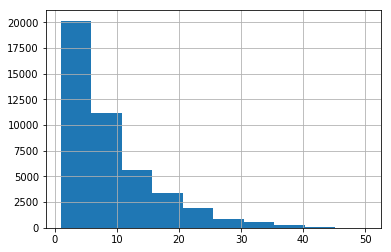

In [130]:
X['YearsCodePro'].hist()

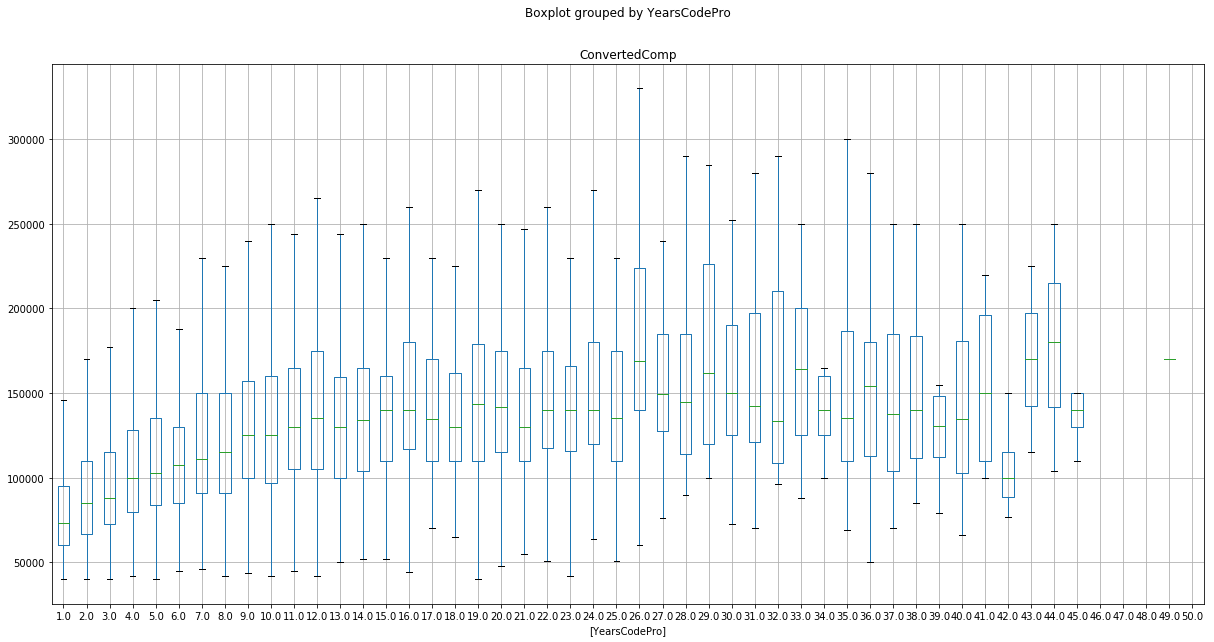

In [84]:
for each_col in numericals: 
    X[[each_col, 'ConvertedComp']].boxplot(by=each_col, showfliers=False, figsize=(20, 10))

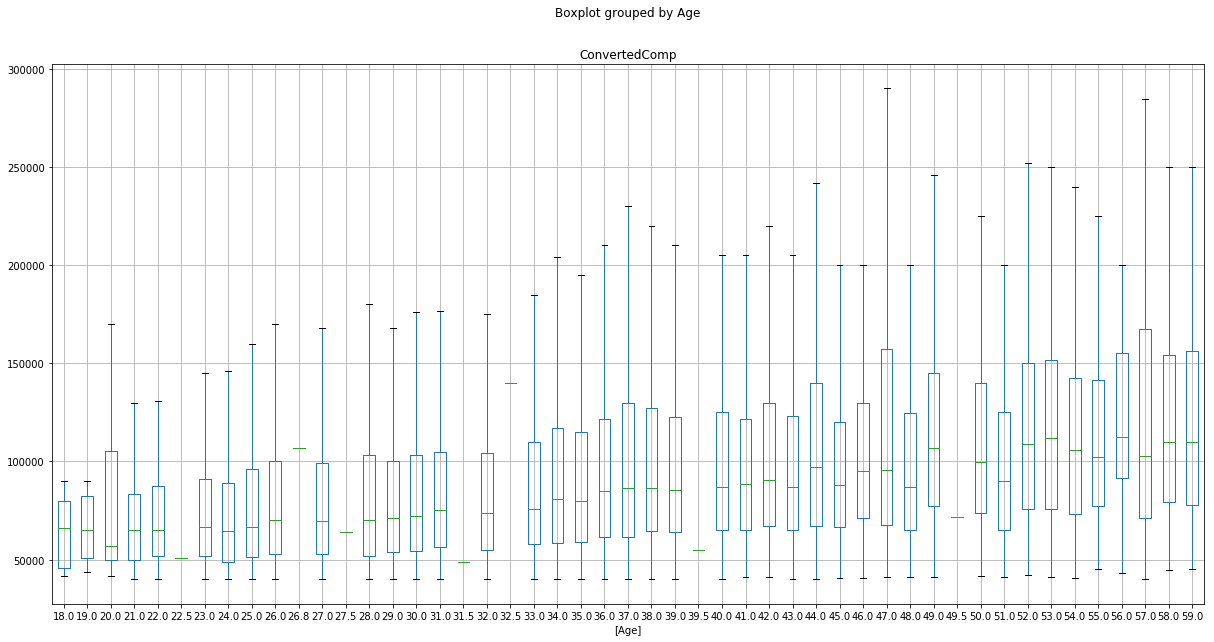

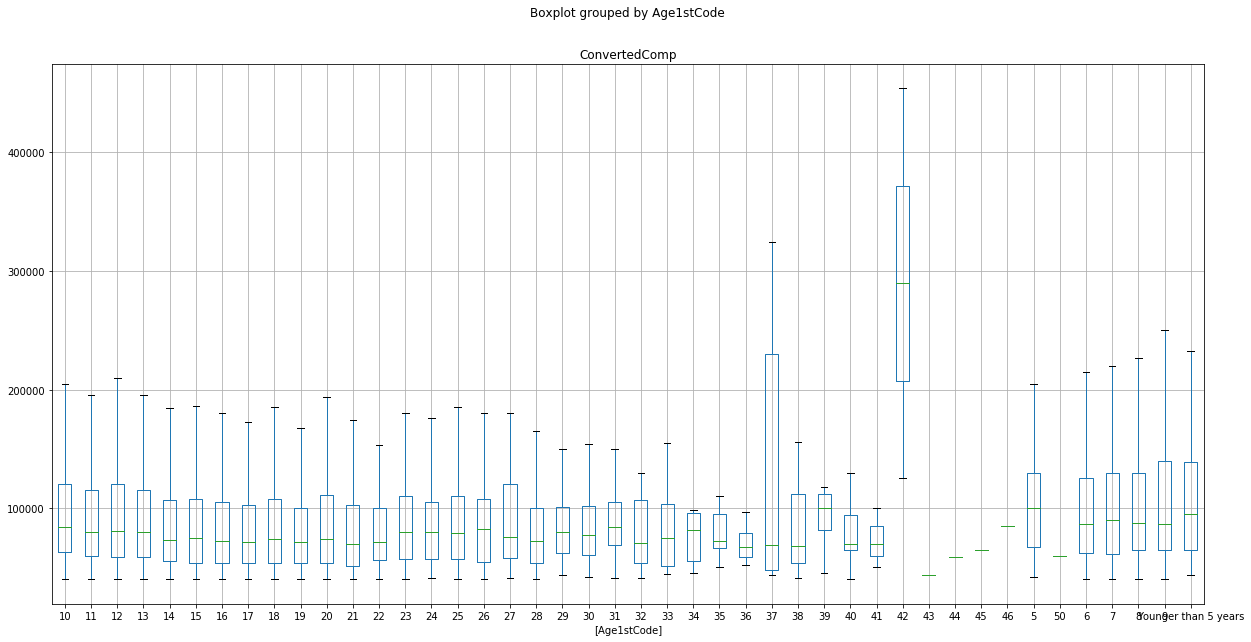

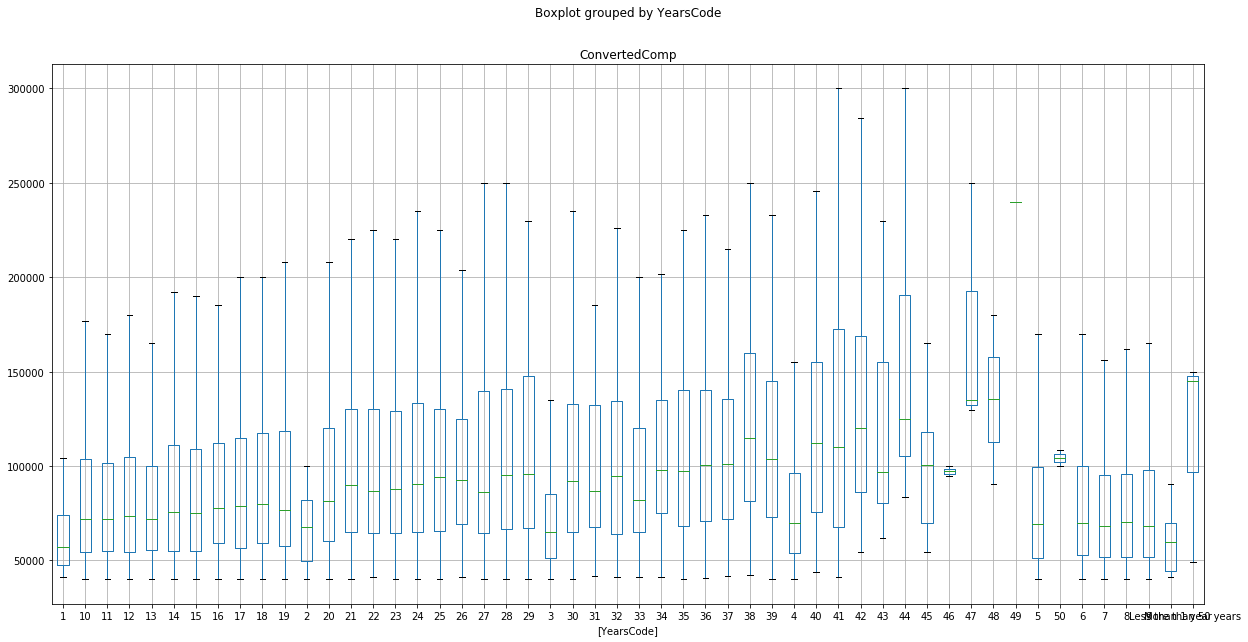

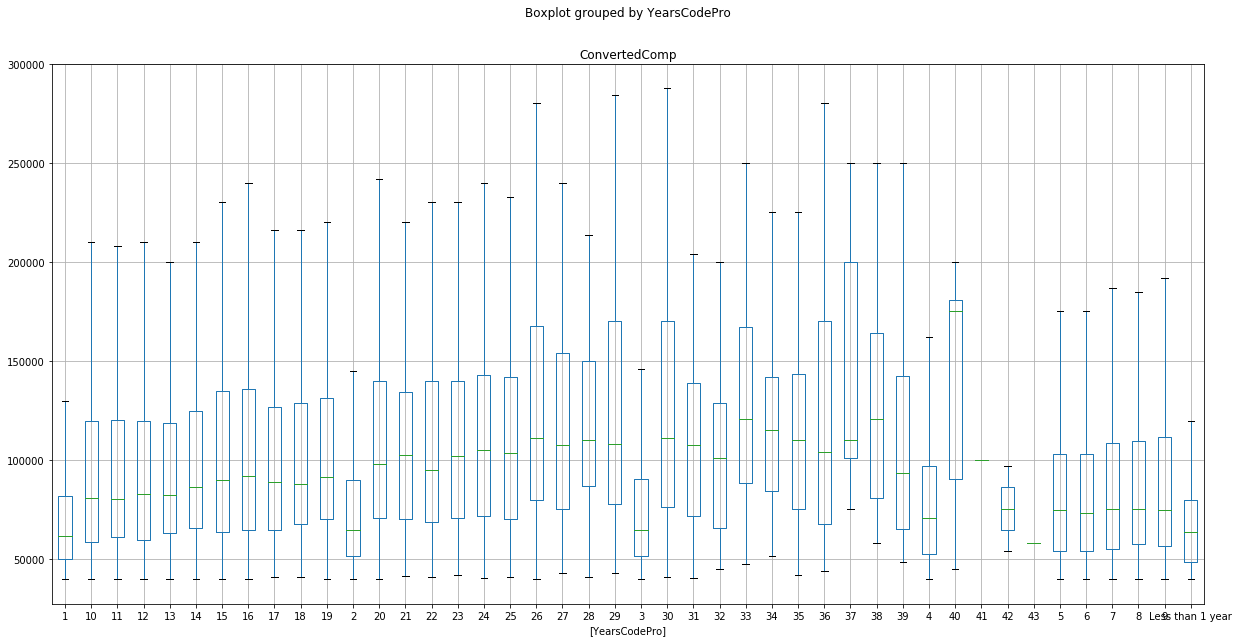

In [53]:
X=df[(df['ConvertedComp']<=500000) & (df['ConvertedComp']>=40000) & (df['Employment']=='Employed full-time') & (df['Age']>17) & (df['Age']<60)]#[['ConvertedComp']]
for each_col in numericals: 
    X[[each_col, 'ConvertedComp']].boxplot(by=each_col, showfliers=False, figsize=(20, 10))

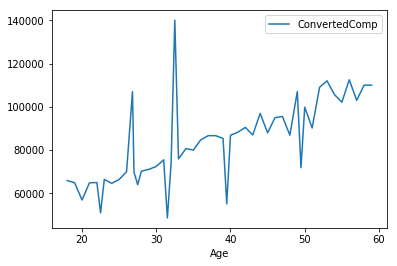

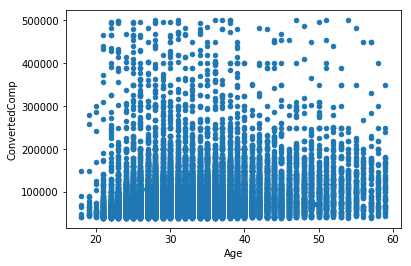

In [34]:
X=df[(df['ConvertedComp']<=500000) & (df['ConvertedComp']>=40000) & (df['Employment']=='Employed full-time') & (df['Age']>17) & (df['Age']<60)]#[['ConvertedComp']]
X[['Age', 'ConvertedComp']].groupby('Age').median().plot()
X[['Age', 'ConvertedComp']].groupby('Age').median()
X[['Age', 'ConvertedComp']].plot(kind='scatter', x='Age', y='ConvertedComp')

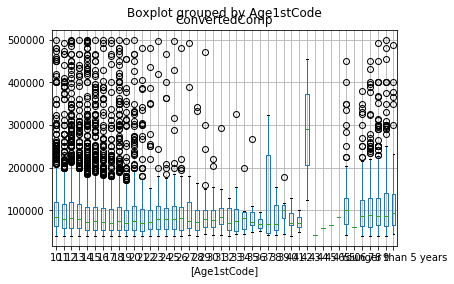

In [36]:
X=df[(df['ConvertedComp']<=500000) & (df['ConvertedComp']>=40000) & (df['Employment']=='Employed full-time') & (df['Age']>17) & (df['Age']<60)]#[['ConvertedComp']]
X[['Age1stCode', 'ConvertedComp']].boxplot(by='Age1stCode')
# X[['Age', 'ConvertedComp']].groupby('Age').median()
# X[['Age', 'ConvertedComp']].plot(kind='scatter', x='Age', y='ConvertedComp')

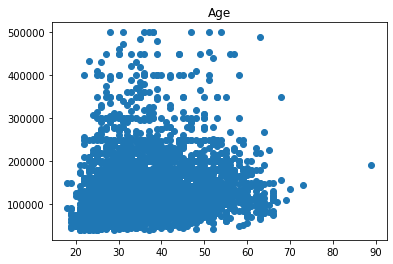

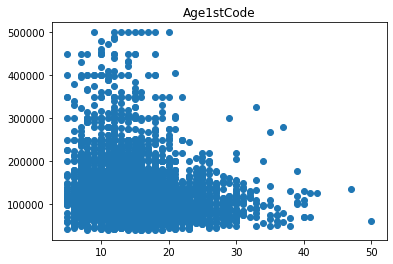

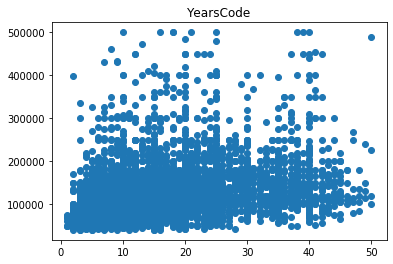

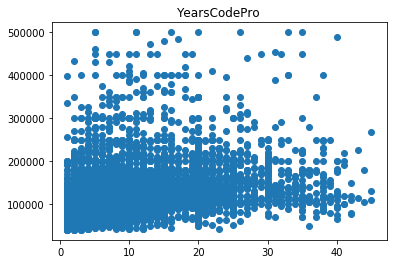

In [50]:
# # fig, ax=plt.subplots(math.ceil(len(numericals)/2), 2)
# # plt.subplots(math.ceil(5/2), 2)
for idx, each_col in enumerate(numericals): 
#     plt.scatter(input_ary[each_col], y, ax=ax[int(idx/2)][int(idx%2)])
    plt.scatter(input_ary[each_col], y)
    plt.title(each_col)
    plt.show()
#     print(ax[0][0])

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
# X=df[['ConvertedComp']]
X=df[(df['ConvertedComp']<=500000) & (df['ConvertedComp']>=40000) & (df['Employment']=='Employed full-time')]#[['ConvertedComp']]
X=X[X['Country']=='United States'][['ConvertedComp']]
for each_col in numericals:
    X=pd.concat([X, pd.to_numeric(df[each_col], errors='coerce')], axis=1)
for each_col in categoricals: 
    X=pd.concat([X, pd.get_dummies(df[each_col])], axis=1)
for each_col in multi_options: 
    X=pd.concat([X, df[each_col].str.get_dummies(sep=';')], axis=1)    
input_ary=X.dropna().drop('ConvertedComp', axis=1)
y=X.dropna()['ConvertedComp']
print(input_ary.shape)
print(sorted(input_ary.columns))
X_train, X_test, y_train, y_test=train_test_split(input_ary, y)
rfr=RandomForestRegressor()
rfr.fit(X_train, y_train)
print(f'Train Score: {rfr.score(X_train, y_train)}')
print(f'Test Score: {rfr.score(X_test, y_test)}')

(5983, 157)
['.NET', '.NET Core', 'A business discipline (such as accounting, finance, marketing, etc.)', 'A health science (such as nursing, pharmacy, radiology, etc.)', 'A humanities discipline (such as literature, history, philosophy, etc.)', 'A natural science (such as biology, chemistry, physics, etc.)', 'A social science (such as anthropology, psychology, political science, etc.)', 'ASP.NET', 'ASP.NET Core', 'AWS', 'Academic researcher', 'Age', 'Age1stCode', 'Android', 'Angular', 'Angular.js', 'Another engineering discipline (such as civil, electrical, mechanical, etc.)', 'Ansible', 'Apache Spark', 'Arduino', 'Assembly', 'Associate degree (A.A., A.S., etc.)', 'Bachelor’s degree (B.A., B.S., B.Eng., etc.)', 'Bash/Shell/PowerShell', 'C', 'C#', 'C++', 'Cassandra', 'Chef', 'Computer science, computer engineering, or software engineering', 'Confluence', 'Cordova', 'Couchbase', 'Dart', 'Data or business analyst', 'Data scientist or machine learning specialist', 'Database administrator'

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Train Score: 0.8616210803147671
Test Score: 0.2299291117147706


Graphing Age: 5983 x 5983
Graphing Age1stCode: 5983 x 5983
Graphing YearsCode: 5983 x 5983
Graphing YearsCodePro: 5983 x 5983
Graphing I am a developer by profession: 5983 x 5983
Graphing I am a student who is learning to code: 5983 x 5983
Graphing I am not primarily a developer, but I write code sometimes as part of my work: 5983 x 5983
Graphing I code primarily as a hobby: 5983 x 5983
Graphing I used to be a developer by profession, but no longer am: 5983 x 5983
Graphing Associate degree (A.A., A.S., etc.): 5983 x 5983
Graphing Bachelor’s degree (B.A., B.S., B.Eng., etc.): 5983 x 5983
Graphing I never completed any formal education: 5983 x 5983
Graphing Master’s degree (M.A., M.S., M.Eng., MBA, etc.): 5983 x 5983
Graphing Other doctoral degree (Ph.D., Ed.D., etc.): 5983 x 5983
Graphing Primary/elementary school: 5983 x 5983
Graphing Professional degree (JD, MD, etc.): 5983 x 5983
Graphing Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.): 5983 x 5983


ValueError: x and y must be the same size

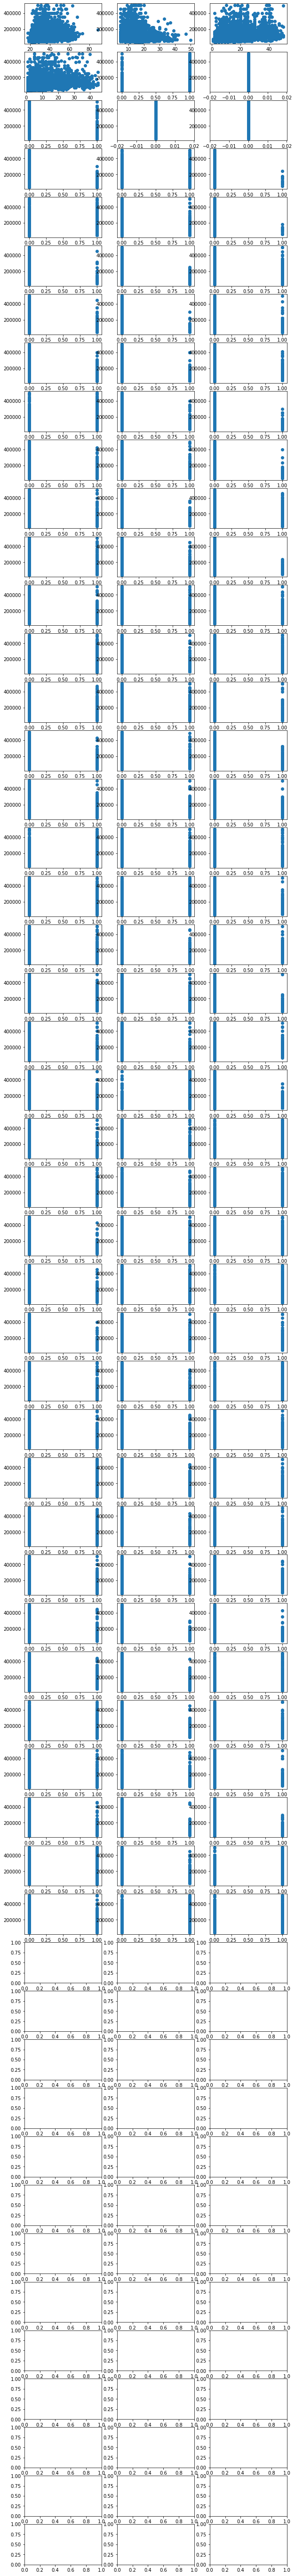

In [74]:
columns=3
columns_list=input_ary.columns
fig, ax=plt.subplots(math.ceil(len(columns_list)/columns), columns, figsize=(10, 100))
for idx, each_col in enumerate(columns_list): 
    print(f'Graphing {each_col}: {len(input_ary[each_col])} x {len(y)}')
    ax[int(idx/columns)][idx%columns].scatter(input_ary[each_col], y)
    
# # ax[int(idx/columns)][idx%columns]

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
# X=df[['ConvertedComp']]
# categoricals=['MainBranch', 'EdLevel', 'UndergradMajor']#, 'Country']
X=df[(df['ConvertedComp']<=500000) & (df['ConvertedComp']>=40000) & (df['Employment']=='Employed full-time')]#[['ConvertedComp']]
X=X[X['Country']=='United States'][['ConvertedComp']]
for each_col in numericals:
    X=pd.concat([X, pd.to_numeric(df[each_col], errors='coerce')], axis=1)
for each_col in categoricals: 
    X=pd.concat([X, pd.get_dummies(df[each_col])], axis=1)
for each_col in multi_options: 
    X=pd.concat([X, df[each_col].str.get_dummies(sep=';')], axis=1)    
input_ary=X.dropna().drop('ConvertedComp', axis=1)
y=X.dropna()['ConvertedComp']
print(input_ary.shape)
print(sorted(input_ary.columns))
X_train, X_test, y_train, y_test=train_test_split(input_ary, y)
rfr=RandomForestRegressor()
rfr.fit(X_train, y_train)
print(f'Train Score: {rfr.score(X_train, y_train)}')
print(f'Test Score: {rfr.score(X_test, y_test)}')

(5983, 157)
['.NET', '.NET Core', 'A business discipline (such as accounting, finance, marketing, etc.)', 'A health science (such as nursing, pharmacy, radiology, etc.)', 'A humanities discipline (such as literature, history, philosophy, etc.)', 'A natural science (such as biology, chemistry, physics, etc.)', 'A social science (such as anthropology, psychology, political science, etc.)', 'ASP.NET', 'ASP.NET Core', 'AWS', 'Academic researcher', 'Age', 'Age1stCode', 'Android', 'Angular', 'Angular.js', 'Another engineering discipline (such as civil, electrical, mechanical, etc.)', 'Ansible', 'Apache Spark', 'Arduino', 'Assembly', 'Associate degree (A.A., A.S., etc.)', 'Bachelor’s degree (B.A., B.S., B.Eng., etc.)', 'Bash/Shell/PowerShell', 'C', 'C#', 'C++', 'Cassandra', 'Chef', 'Computer science, computer engineering, or software engineering', 'Confluence', 'Cordova', 'Couchbase', 'Dart', 'Data or business analyst', 'Data scientist or machine learning specialist', 'Database administrator'

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Train Score: 0.8552610858985985
Test Score: 0.21086560445563463


In [136]:
sorted(list(zip(rfr.feature_importances_, input_ary.columns)), reverse=True)

[(0.19046254197770188, 'YearsCodePro'),
 (0.01841103450408082, 'Microsoft SQL Server'),
 (0.017335110821957506, 'jQuery'),
 (0.016518821204849418, 'C++'),
 (0.015648007857340246, 'Facebook Workplace'),
 (0.015404805936876789, 'Windows'),
 (0.015212134479529182, 'HTML/CSS'),
 (0.013974511510984847, 'Go'),
 (0.013931513626058475, 'Engineering manager'),
 (0.013127583424824769, 'Google Cloud Platform'),
 (0.013064840797182875, 'Rust'),
 (0.012476249625394321, 'Jira'),
 (0.011959350121924372, 'Confluence'),
 (0.011499889484540943, 'Slack'),
 (0.011106759161237932, 'Docker'),
 (0.011081490402033467, 'Senior executive/VP'),
 (0.010994939786895388, 'Google Suite (Docs, Meet, etc)'),
 (0.01094143300609074, 'Github'),
 (0.010711725268556002, 'PHP'),
 (0.010658972392020601, 'DynamoDB'),
 (0.009980393532015082, 'Linux'),
 (0.009941458102783263, 'JavaScript'),
 (0.009846688565832692, 'SQL'),
 (0.009753458407202358, 'C#'),
 (0.009750062221147177, 'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)'),


In [38]:
country_list=X['Country'].unique()
fig, ax=plt.subplots(1, 2)
for idx, each_country in enumerate(country_list): 
    X[X['Country']==each_country]['ConvertedComp'].hist(ax=ax[idx%2])
    ax[idx%2].set_title(each_country)
    if (idx%2)!=0:
        plt.show()
        fig, ax=plt.subplots(1, 2)

KeyError: 'Country'

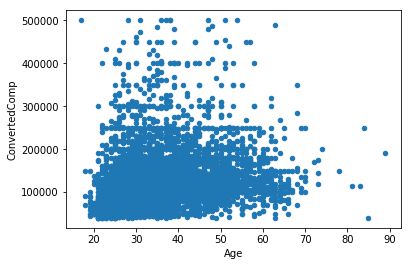

In [38]:
X.plot('Age', 'ConvertedComp', kind='scatter')

In [39]:
len(X)

64461

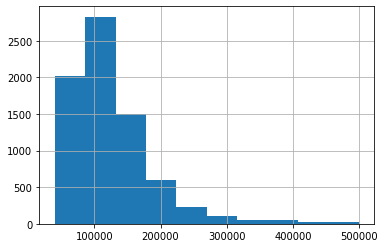

In [129]:
X['ConvertedComp'].hist()

In [49]:
input_ary=X.dropna().drop('ConvertedComp', axis=1)
y=X.dropna()['ConvertedComp']
print(input_ary.shape)
sorted(input_ary.columns)

(5983, 4)


['Age', 'Age1stCode', 'YearsCode', 'YearsCodePro']

In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(input_ary, y)
rfr=RandomForestRegressor()
rfr.fit(X_train, y_train)
print(f'Train Score: {rfr.score(X_train, y_train)}')
print(f'Test Score: {rfr.score(X_test, y_test)}')

Train Score: 0.2519919997557962
Test Score: 0.007281143831855741


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [30]:
sorted(list(zip(rfr.feature_importances_, input_ary.columns)), reverse=True)

[(0.6461945257021073, 'YearsCodePro'), (0.3538054742978926, 'YearsCode')]

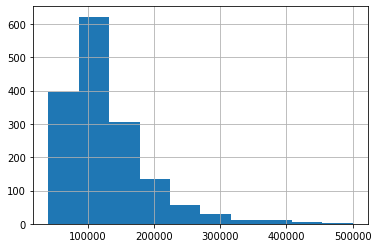

In [116]:
y_test.hist()

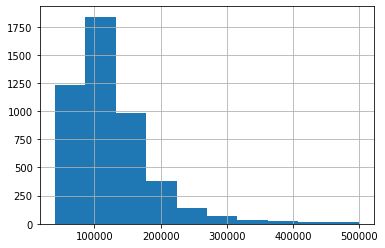

In [117]:
y_train.hist()

In [118]:
sample=random.randint(0, len(input_ary))
print(f'Sample {sample}: Predicted {rfr.predict([input_ary.iloc[sample]])} vs. Actual {y.iloc[sample]}')

Sample 1895: Predicted [147200.] vs. Actual 115000.0


# Linear Regression

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# scaler=StandardScaler()
# scaler.fit(X_train)
# X_train=scaler.transform(X_train)
# X_test=scaler.transform(X_test)

lr=LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)
# lr.fit(input_ary, y)
# lr.score(input_ary, y)

0.10458292668266389

In [120]:
pd.concat([input_ary, y], axis=1).corr()

,Age,Age1stCode,YearsCode,YearsCodePro,I am a developer by profession,I am a student who is learning to code,"I am not primarily a developer, but I write code sometimes as part of my work",I code primarily as a hobby,"I used to be a developer by profession, but no longer am","Associate degree (A.A., A.S., etc.)",...,United Republic of Tanzania,United States,Uruguay,Uzbekistan,"Venezuela, Bolivarian Republic of...",Viet Nam,Yemen,Zambia,Zimbabwe,ConvertedComp
Age,1.000000,0.024958,0.804631,0.848196,-0.087827,NaN,0.087827,NaN,NaN,0.022553,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.238432
Age1stCode,0.024958,1.000000,-0.339182,-0.165010,-0.015597,NaN,0.015597,NaN,NaN,0.026562,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.155800
YearsCode,0.804631,-0.339182,1.000000,0.889315,-0.034693,NaN,0.034693,NaN,NaN,-0.005927,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.310869
YearsCodePro,0.848196,-0.165010,0.889315,1.000000,-0.000252,NaN,0.000252,NaN,NaN,0.003058,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.318865
I am a developer by profession,-0.087827,-0.015597,-0.034693,-0.000252,1.000000,NaN,-1.000000,NaN,NaN,0.001171,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.027845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Viet Nam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Yemen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zambia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zimbabwe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
# sorted(list(zip(lr.feature_importances_, input_ary.columns)), reverse=True)

In [36]:
sample=random.randint(0, len(input_ary))
print(f'Sample {sample}: Predicted {lr.predict([input_ary.iloc[sample]])} vs. Actual {y.iloc[sample]}')

Sample 20939: Predicted [118998.] vs. Actual 125000.0


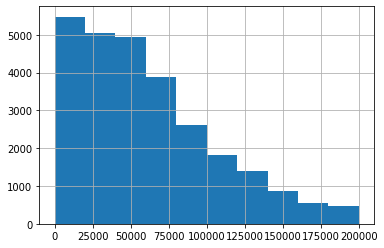

In [37]:
y.hist()

In [38]:
sorted(list(zip(lr.coef_, input_ary.columns)), reverse=True)

[(2426023947109233.5, 'I am a student who is learning to code'),
 (991503667328940.0, 'I code primarily as a hobby'),
 (262347868603312.0, 'Bahamas'),
 (61453302869705.805, 'Cape Verde'),
 (34734744215985.87, 'Burundi'),
 (16391583293851.691, 'Antigua and Barbuda'),
 (5609401917969.099, 'Liechtenstein'),
 (4662689295839.5625, 'Gambia'),
 (4458970706911.093, 'Libyan Arab Jamahiriya'),
 (2961356137186.703, 'Fiji'),
 (2141773325017.5042, 'Gabon'),
 (1895532133566.1768, 'Namibia'),
 (1799020161363.7231, 'Haiti'),
 (1461234517251.7798, 'Nauru'),
 (1301073169372.9092, 'Mozambique'),
 (1057935901761.39, 'Marshall Islands'),
 (983958561692.1804, 'Kiribati'),
 (626715583880.5612, 'Mauritania'),
 (273428562908.77737, 'Maldives'),
 (269915350742.3785, 'Papua New Guinea'),
 (167522928663.7578, 'Solomon Islands'),
 (141124257780.9145, 'Saint Lucia'),
 (14951.126206144287, 'I never completed any formal education'),
 (13407.59375, 'Engineering manager'),
 (12287.200543561921, 'Other doctoral degree (

In [39]:
y_test.max()

200000.0

In [40]:
import numpy as np
np.max(lr.predict(X_test))

343840236338071.0

In [47]:
lr.intercept_

5042936115521417.0

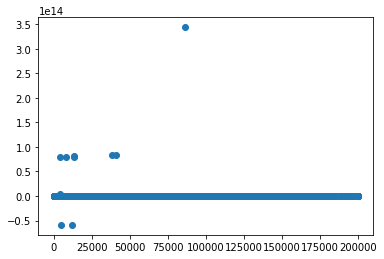

In [41]:
plt.scatter(y_test, lr.predict(X_test))

(array([2.00e+00, 6.76e+03, 0.00e+00, 6.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00]),
 array([-5.88412927e+13, -1.85731398e+13,  2.16950131e+13,  6.19631660e+13,
         1.02231319e+14,  1.42499472e+14,  1.82767625e+14,  2.23035778e+14,
         2.63303931e+14,  3.03572083e+14,  3.43840236e+14]),
 <a list of 10 Patch objects>)

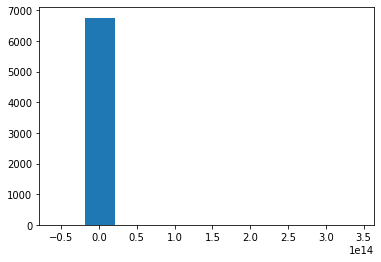

In [46]:
plt.hist(lr.predict(X_test))

In [430]:
print(categoricals)
print(numericals)
print(multi_options)

['MainBranch', 'EdLevel', 'UndergradMajor', 'Country']
['Age', 'Age1stCode', 'YearsCode', 'YearsCodePro']
[]


['MainBranch', 'EdLevel', 'UndergradMajor', 'Country']

['Age', 'Age1stCode', 'YearsCode', 'YearsCodePro']

[]

LR - -244864609971947.5

RFR - 0.6037828435133481

In [91]:
list(input_ary.columns)

['Age',
 'Age1stCode',
 'YearsCode',
 'YearsCodePro',
 'I am a developer by profession',
 'I am a student who is learning to code',
 'I am not primarily a developer, but I write code sometimes as part of my work',
 'I code primarily as a hobby',
 'I used to be a developer by profession, but no longer am',
 'Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Congo, Republic of the...',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 "Côte d'Ivoire",
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominican Republic',
 'Ecuador',

In [24]:
categoricals={}
for col, col_type in df.dtypes.iteritems(): 
    if col_type=='O':
        categoricals[col]=df[col].nunique()
#         print(f'{col} is {col_type}')
        
categoricals

{'MainBranch': 5,
 'Hobbyist': 2,
 'Age1stCode': 63,
 'CompFreq': 3,
 'Country': 183,
 'CurrencyDesc': 142,
 'CurrencySymbol': 141,
 'DatabaseDesireNextYear': 3193,
 'DatabaseWorkedWith': 2808,
 'DevType': 8269,
 'EdLevel': 9,
 'Employment': 7,
 'Ethnicity': 208,
 'Gender': 7,
 'JobFactors': 230,
 'JobSat': 5,
 'JobSeek': 3,
 'LanguageDesireNextYear': 16243,
 'LanguageWorkedWith': 14256,
 'MiscTechDesireNextYear': 5216,
 'MiscTechWorkedWith': 2730,
 'NEWCollabToolsDesireNextYear': 1277,
 'NEWCollabToolsWorkedWith': 1153,
 'NEWDevOps': 3,
 'NEWDevOpsImpt': 5,
 'NEWEdImpt': 5,
 'NEWJobHunt': 2172,
 'NEWJobHuntResearch': 63,
 'NEWLearn': 4,
 'NEWOffTopic': 3,
 'NEWOnboardGood': 3,
 'NEWOtherComms': 2,
 'NEWOvertime': 5,
 'NEWPurchaseResearch': 63,
 'NEWPurpleLink': 4,
 'NEWSOSites': 61,
 'NEWStuck': 444,
 'OpSys': 4,
 'OrgSize': 9,
 'PlatformDesireNextYear': 7471,
 'PlatformWorkedWith': 6287,
 'PurchaseWhat': 3,
 'Sexuality': 14,
 'SOAccount': 3,
 'SOComm': 6,
 'SOPartFreq': 6,
 'SOVisitF

In [74]:
ohe.get_feature_names()

array(['x0_Man',
       'x0_Man;Non-binary, genderqueer, or gender non-conforming',
       'x0_Non-binary, genderqueer, or gender non-conforming', 'x0_Woman',
       'x0_Woman;Man',
       'x0_Woman;Man;Non-binary, genderqueer, or gender non-conforming',
       'x0_Woman;Non-binary, genderqueer, or gender non-conforming'],
      dtype=object)

In [75]:
df['Gender'].str.get_dummies(sep=';')

,Man,"Non-binary, genderqueer, or gender non-conforming",Woman
0,1,0,0
1,0,0,0
2,0,0,0
3,1,0,0
4,1,0,0
...,...,...,...
64456,0,0,0
64457,0,0,0
64458,0,0,0
64459,0,0,0


In [53]:
for each_col in categoricals: 
    if categoricals[each_col]<100: 
        print(f'{each_col} options: {df[each_col].unique()}')
        print('='*20)

MainBranch options: ['I am a developer by profession' 'I code primarily as a hobby'
 'I used to be a developer by profession, but no longer am'
 'I am not primarily a developer, but I write code sometimes as part of my work'
 'I am a student who is learning to code' nan]
Hobbyist options: ['Yes' 'No' nan]
Age1stCode options: ['13' '19' '15' '18' '16' '14' '12' '20' '42' '8' '25' '22' '30' '17' '21'
 '10' '46' '9' '7' '11' '6' nan '31' '29' '5' 'Younger than 5 years' '28'
 '38' '23' '27' '41' '24' '53' '26' '35' '32' '40' '33' '36' '54' '48'
 '56' '45' '44' '34' 'Older than 85' '39' '51' '68' '50' '37' '47' '43'
 '52' '85' '64' '55' '58' '49' '76' '72' '73' '83' '63']
CompFreq options: ['Monthly' nan 'Yearly' 'Weekly']
EdLevel options: ['Master’s degree (M.A., M.S., M.Eng., MBA, etc.)'
 'Bachelor’s degree (B.A., B.S., B.Eng., etc.)' nan
 'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)'
 'Professional degree (JD, MD, etc.)'
 'Some college/university st

In [44]:
comp_cols=['CompFreq','CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc','CurrencySymbol']
comp_df=df[comp_cols].dropna()
comp_df[comp_df['CompFreq']=='Weekly']

,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol
85,Weekly,2.000000e+03,108100.0,France,European Euro,EUR
121,Weekly,1.200000e+05,2000000.0,United States,United States dollar,USD
132,Weekly,3.250000e+03,210050.0,United Kingdom,Pound sterling,GBP
173,Weekly,7.600000e+02,41100.0,Netherlands,European Euro,EUR
191,Weekly,1.200000e+05,2000000.0,United States,United States dollar,USD
...,...,...,...,...,...,...
63762,Weekly,1.600000e+03,80000.0,United States,United States dollar,USD
63925,Weekly,8.740000e+09,1000000.0,Afghanistan,Afghan afghani,AFN
63993,Weekly,5.521171e+09,1000000.0,Afghanistan,Afghan afghani,AFN
64035,Weekly,6.600000e+04,2000000.0,United States,United States dollar,USD


(-2000.001, 100000.0]     26847
(100000.0, 200000.0]       5603
(200000.0, 300000.0]        686
(900000.0, 1000000.0]       338
(1900000.0, 2000000.0]      265
(300000.0, 400000.0]        235
(400000.0, 500000.0]        159
(500000.0, 600000.0]        154
(600000.0, 700000.0]        133
(700000.0, 800000.0]        110
(800000.0, 900000.0]         93
(1400000.0, 1500000.0]       22
(1100000.0, 1200000.0]       22
(1000000.0, 1100000.0]       21
(1200000.0, 1300000.0]       17
(1700000.0, 1800000.0]       14
(1300000.0, 1400000.0]       13
(1600000.0, 1700000.0]       13
(1500000.0, 1600000.0]        6
(1800000.0, 1900000.0]        5
Name: ConvertedComp, dtype: int64

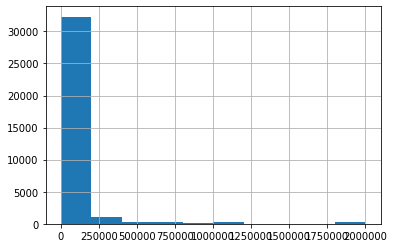

In [52]:
# comp_df[comp_df['ConvertedComp']<500000]['ConvertedComp'].hist()
# comp_df[comp_df['ConvertedComp']<500000]['ConvertedComp'].value_counts(bins=10)
comp_df['ConvertedComp'].hist()
comp_df['ConvertedComp'].value_counts(bins=20)

In [35]:
currency_api_url='https://api.exchangeratesapi.io/latest?base=USD'
response=requests.get(currency_api_url)
currency_conv=response.json()['rates']
currency_conv

{'CAD': 1.2857142857,
 'HKD': 7.7506373879,
 'ISK': 125.0925240563,
 'PHP': 48.0549387285,
 'DKK': 6.1213093182,
 'HUF': 294.9008964553,
 'CZK': 21.8093593223,
 'GBP': 0.7425117197,
 'RON': 4.0073196809,
 'SEK': 8.4363845711,
 'IDR': 14164.2980508265,
 'INR': 73.7523645037,
 'BRL': 5.1615264413,
 'RUB': 74.0750884119,
 'HRK': 6.2024015133,
 'JPY': 103.9888148696,
 'THB': 30.1603750308,
 'CHF': 0.8900402994,
 'EUR': 0.8224360556,
 'MYR': 4.0600378321,
 'BGN': 1.6085204375,
 'TRY': 7.7832058557,
 'CNY': 6.5318693972,
 'NOK': 8.7670038654,
 'NZD': 1.4190311703,
 'ZAR': 15.1882556131,
 'USD': 1.0,
 'MXN': 19.828193108,
 'SGD': 1.3328398717,
 'AUD': 1.3477259643,
 'ILS': 3.2667160128,
 'KRW': 1086.109055021,
 'PLN': 3.6819639773}

In [37]:
#df['Comp_USD']=
df.dropna()
df.apply(lambda x: x['CompTotal']/currency_conv['CurrencySymbol'])# if x['CurrencySymbol'] != 'USD')

KeyError: ('CompTotal', 'occurred at index Respondent')